In [102]:
# Importing the libraries
import pandas as pd        # for data manipulation
import seaborn as sns      # for statistical data visualisation
import numpy as np         # for linear algebra
import matplotlib.pyplot as plt      # for data visualization
from scipy import stats        # for calculating statistics

# Importing various machine learning algorithm from sklearn

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_absolute_error,roc_curve,auc,accuracy_score
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


In [103]:
df= pd.read_csv("cars_class (1).csv")  # Reading the data
df.head()   # showing first 5 datas

ID  Comp  Circ  D.Circ  Rad.Ra  Pr.Axis.Ra  Max.L.Ra  Scat.Ra  Elong  \
0   1    88    39      70     166          66         7      148     44   
1   2    85    35      64     129          57         6      116     57   
2   3    91    41      84     141          57         9      149     45   
3   4   102    54      98     177          56        10      219     31   
4   5    87    39      74     152          58         6      151     44   

   Pr.Axis.Rect  Max.L.Rect  Sc.Var.Maxis  Sc.Var.maxis  Ra.Gyr  Skew.Maxis  \
0            19         134           167           332     143          69   
1            17         125           138           200     123          65   
2            19         143           170           330     158          72   
3            25         171           219           706     223          72   
4            19         136           174           337     140          70   

   Skew.maxis  Kurt.maxis  Kurt.Maxis  Holl.Ra  Class  
0           5          13         193      201      0  
1           1          23         196      203      3  
2           9          14         189      199      3  
3           5          17         186      196      1  
4           1          33         187      196      2

In [104]:
df.shape

(719, 20)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            719 non-null    int64
 1   Comp          719 non-null    int64
 2   Circ          719 non-null    int64
 3   D.Circ        719 non-null    int64
 4   Rad.Ra        719 non-null    int64
 5   Pr.Axis.Ra    719 non-null    int64
 6   Max.L.Ra      719 non-null    int64
 7   Scat.Ra       719 non-null    int64
 8   Elong         719 non-null    int64
 9   Pr.Axis.Rect  719 non-null    int64
 10  Max.L.Rect    719 non-null    int64
 11  Sc.Var.Maxis  719 non-null    int64
 12  Sc.Var.maxis  719 non-null    int64
 13  Ra.Gyr        719 non-null    int64
 14  Skew.Maxis    719 non-null    int64
 15  Skew.maxis    719 non-null    int64
 16  Kurt.maxis    719 non-null    int64
 17  Kurt.Maxis    719 non-null    int64
 18  Holl.Ra       719 non-null    int64
 19  Class         719 non-null   

In [106]:
df.describe()

ID        Comp        Circ      D.Circ      Rad.Ra  Pr.Axis.Ra  \
count  719.000000  719.000000  719.000000  719.000000  719.000000  719.000000   
mean   360.000000   93.435327   44.851182   81.723227  168.579972   61.847010   
std    207.701709    8.111406    6.150286   15.528208   33.809172    8.259136   
min      1.000000   73.000000   33.000000   40.000000  105.000000   47.000000   
25%    180.500000   87.000000   40.000000   70.000000  141.000000   57.000000   
50%    360.000000   93.000000   44.000000   79.000000  166.000000   61.000000   
75%    539.500000   99.000000   49.000000   96.000000  194.500000   65.000000   
max    719.000000  119.000000   59.000000  110.000000  333.000000  138.000000   

         Max.L.Ra     Scat.Ra       Elong  Pr.Axis.Rect  Max.L.Rect  \
count  719.000000  719.000000  719.000000    719.000000  719.000000   
mean     8.625869  168.137691   41.075104     20.531293  148.030598   
std      4.916908   32.937591    7.764459      2.560969   14.560092   
min      2.000000  112.000000   26.000000     17.000000  118.000000   
25%      6.000000  146.000000   33.000000     19.000000  137.000000   
50%      8.000000  157.000000   43.000000     20.000000  146.000000   
75%     10.000000  197.500000   46.000000     23.000000  159.000000   
max     55.000000  265.000000   61.000000     29.000000  188.000000   

       Sc.Var.Maxis  Sc.Var.maxis      Ra.Gyr  Skew.Maxis  Skew.maxis  \
count    719.000000    719.000000  719.000000  719.000000  719.000000   
mean     188.168289    436.215577  174.726008   72.682893    6.343533   
std       31.235395    174.964977   32.149568    7.542055    4.856169   
min      130.000000    184.000000  109.000000   59.000000    0.000000   
25%      167.000000    317.000000  149.000000   68.000000    2.000000   
50%      178.000000    362.000000  174.000000   72.000000    6.000000   
75%      216.000000    584.500000  198.000000   76.000000    9.000000   
max      320.000000   1018.000000  262.000000  135.000000   22.000000   

       Kurt.maxis  Kurt.Maxis     Holl.Ra       Class  
count  719.000000  719.000000  719.000000  719.000000  
mean    12.394993  188.798331  195.407510    1.470097  
std      8.742511    6.048522    7.235166    1.126477  
min      0.000000  176.000000  181.000000    0.000000  
25%      5.500000  184.000000  190.000000    0.000000  
50%     11.000000  188.000000  196.000000    1.000000  
75%     18.000000  193.000000  201.000000    2.000000  
max     41.000000  204.000000  211.000000    3.000000

In [107]:
df.set_index("ID",inplace=True)

In [108]:
df.isnull().sum()

Comp            0
Circ            0
D.Circ          0
Rad.Ra          0
Pr.Axis.Ra      0
Max.L.Ra        0
Scat.Ra         0
Elong           0
Pr.Axis.Rect    0
Max.L.Rect      0
Sc.Var.Maxis    0
Sc.Var.maxis    0
Ra.Gyr          0
Skew.Maxis      0
Skew.maxis      0
Kurt.maxis      0
Kurt.Maxis      0
Holl.Ra         0
Class           0
dtype: int64

In [109]:
df.head()

Comp  Circ  D.Circ  Rad.Ra  Pr.Axis.Ra  Max.L.Ra  Scat.Ra  Elong  \
ID                                                                     
1     88    39      70     166          66         7      148     44   
2     85    35      64     129          57         6      116     57   
3     91    41      84     141          57         9      149     45   
4    102    54      98     177          56        10      219     31   
5     87    39      74     152          58         6      151     44   

    Pr.Axis.Rect  Max.L.Rect  Sc.Var.Maxis  Sc.Var.maxis  Ra.Gyr  Skew.Maxis  \
ID                                                                             
1             19         134           167           332     143          69   
2             17         125           138           200     123          65   
3             19         143           170           330     158          72   
4             25         171           219           706     223          72   
5             19         136           174           337     140          70   

    Skew.maxis  Kurt.maxis  Kurt.Maxis  Holl.Ra  Class  
ID                                                      
1            5          13         193      201      0  
2            1          23         196      203      3  
3            9          14         189      199      3  
4            5          17         186      196      1  
5            1          33         187      196      2

In [110]:
df.apply(lambda x: len(x.unique()))

Comp             43
Circ             27
D.Circ           60
Rad.Ra          132
Pr.Axis.Ra       37
Max.L.Ra         21
Scat.Ra         125
Elong            35
Pr.Axis.Rect     13
Max.L.Rect       66
Sc.Var.Maxis    124
Sc.Var.maxis    380
Ra.Gyr          138
Skew.Maxis       39
Skew.maxis       23
Kurt.maxis       38
Kurt.Maxis       29
Holl.Ra          31
Class             4
dtype: int64

In [111]:
df.describe()

Comp        Circ      D.Circ      Rad.Ra  Pr.Axis.Ra    Max.L.Ra  \
count  719.000000  719.000000  719.000000  719.000000  719.000000  719.000000   
mean    93.435327   44.851182   81.723227  168.579972   61.847010    8.625869   
std      8.111406    6.150286   15.528208   33.809172    8.259136    4.916908   
min     73.000000   33.000000   40.000000  105.000000   47.000000    2.000000   
25%     87.000000   40.000000   70.000000  141.000000   57.000000    6.000000   
50%     93.000000   44.000000   79.000000  166.000000   61.000000    8.000000   
75%     99.000000   49.000000   96.000000  194.500000   65.000000   10.000000   
max    119.000000   59.000000  110.000000  333.000000  138.000000   55.000000   

          Scat.Ra       Elong  Pr.Axis.Rect  Max.L.Rect  Sc.Var.Maxis  \
count  719.000000  719.000000    719.000000  719.000000    719.000000   
mean   168.137691   41.075104     20.531293  148.030598    188.168289   
std     32.937591    7.764459      2.560969   14.560092     31.235395   
min    112.000000   26.000000     17.000000  118.000000    130.000000   
25%    146.000000   33.000000     19.000000  137.000000    167.000000   
50%    157.000000   43.000000     20.000000  146.000000    178.000000   
75%    197.500000   46.000000     23.000000  159.000000    216.000000   
max    265.000000   61.000000     29.000000  188.000000    320.000000   

       Sc.Var.maxis      Ra.Gyr  Skew.Maxis  Skew.maxis  Kurt.maxis  \
count    719.000000  719.000000  719.000000  719.000000  719.000000   
mean     436.215577  174.726008   72.682893    6.343533   12.394993   
std      174.964977   32.149568    7.542055    4.856169    8.742511   
min      184.000000  109.000000   59.000000    0.000000    0.000000   
25%      317.000000  149.000000   68.000000    2.000000    5.500000   
50%      362.000000  174.000000   72.000000    6.000000   11.000000   
75%      584.500000  198.000000   76.000000    9.000000   18.000000   
max     1018.000000  262.000000  135.000000   22.000000   41.000000   

       Kurt.Maxis     Holl.Ra       Class  
count  719.000000  719.000000  719.000000  
mean   188.798331  195.407510    1.470097  
std      6.048522    7.235166    1.126477  
min    176.000000  181.000000    0.000000  
25%    184.000000  190.000000    0.000000  
50%    188.000000  196.000000    1.000000  
75%    193.000000  201.000000    2.000000  
max    204.000000  211.000000    3.000000

In [112]:
dt=df.iloc[:,0:18].copy()
dt

Comp  Circ  D.Circ  Rad.Ra  Pr.Axis.Ra  Max.L.Ra  Scat.Ra  Elong  \
ID                                                                      
1      88    39      70     166          66         7      148     44   
2      85    35      64     129          57         6      116     57   
3      91    41      84     141          57         9      149     45   
4     102    54      98     177          56        10      219     31   
5      87    39      74     152          58         6      151     44   
..    ...   ...     ...     ...         ...       ...      ...    ...   
715   111    58     105     183          51         6      265     26   
716    93    43      76     149          57         7      149     44   
717    90    42      63     144          59         7      131     50   
718   101    56     101     231          72        10      217     31   
719    99    38      74     184          66         6      164     39   

     Pr.Axis.Rect  Max.L.Rect  Sc.Var.Maxis  Sc.Var.maxis  Ra.Gyr  Skew.Maxis  \
ID                                                                              
1              19         134           167           332     143          69   
2              17         125           138           200     123          65   
3              19         143           170           330     158          72   
4              25         171           219           706     223          72   
5              19         136           174           337     140          70   
..            ...         ...           ...           ...     ...         ...   
715            29         174           285          1018     255          85   
716            19         143           172           335     176          69   
717            18         142           154           259     162          65   
718            24         171           232           698     216          72   
719            20         131           193           414     137          71   

     Skew.maxis  Kurt.maxis  Kurt.Maxis  Holl.Ra  
ID                                                
1             5          13         193      201  
2             1          23         196      203  
3             9          14         189      199  
4             5          17         186      196  
5             1          33         187      196  
..          ...         ...         ...      ...  
715           4           8         181      183  
716          14           0         189      194  
717          15           3         197      204  
718           2           6         187      197  
719           2          22         200      202  

[719 rows x 18 columns]

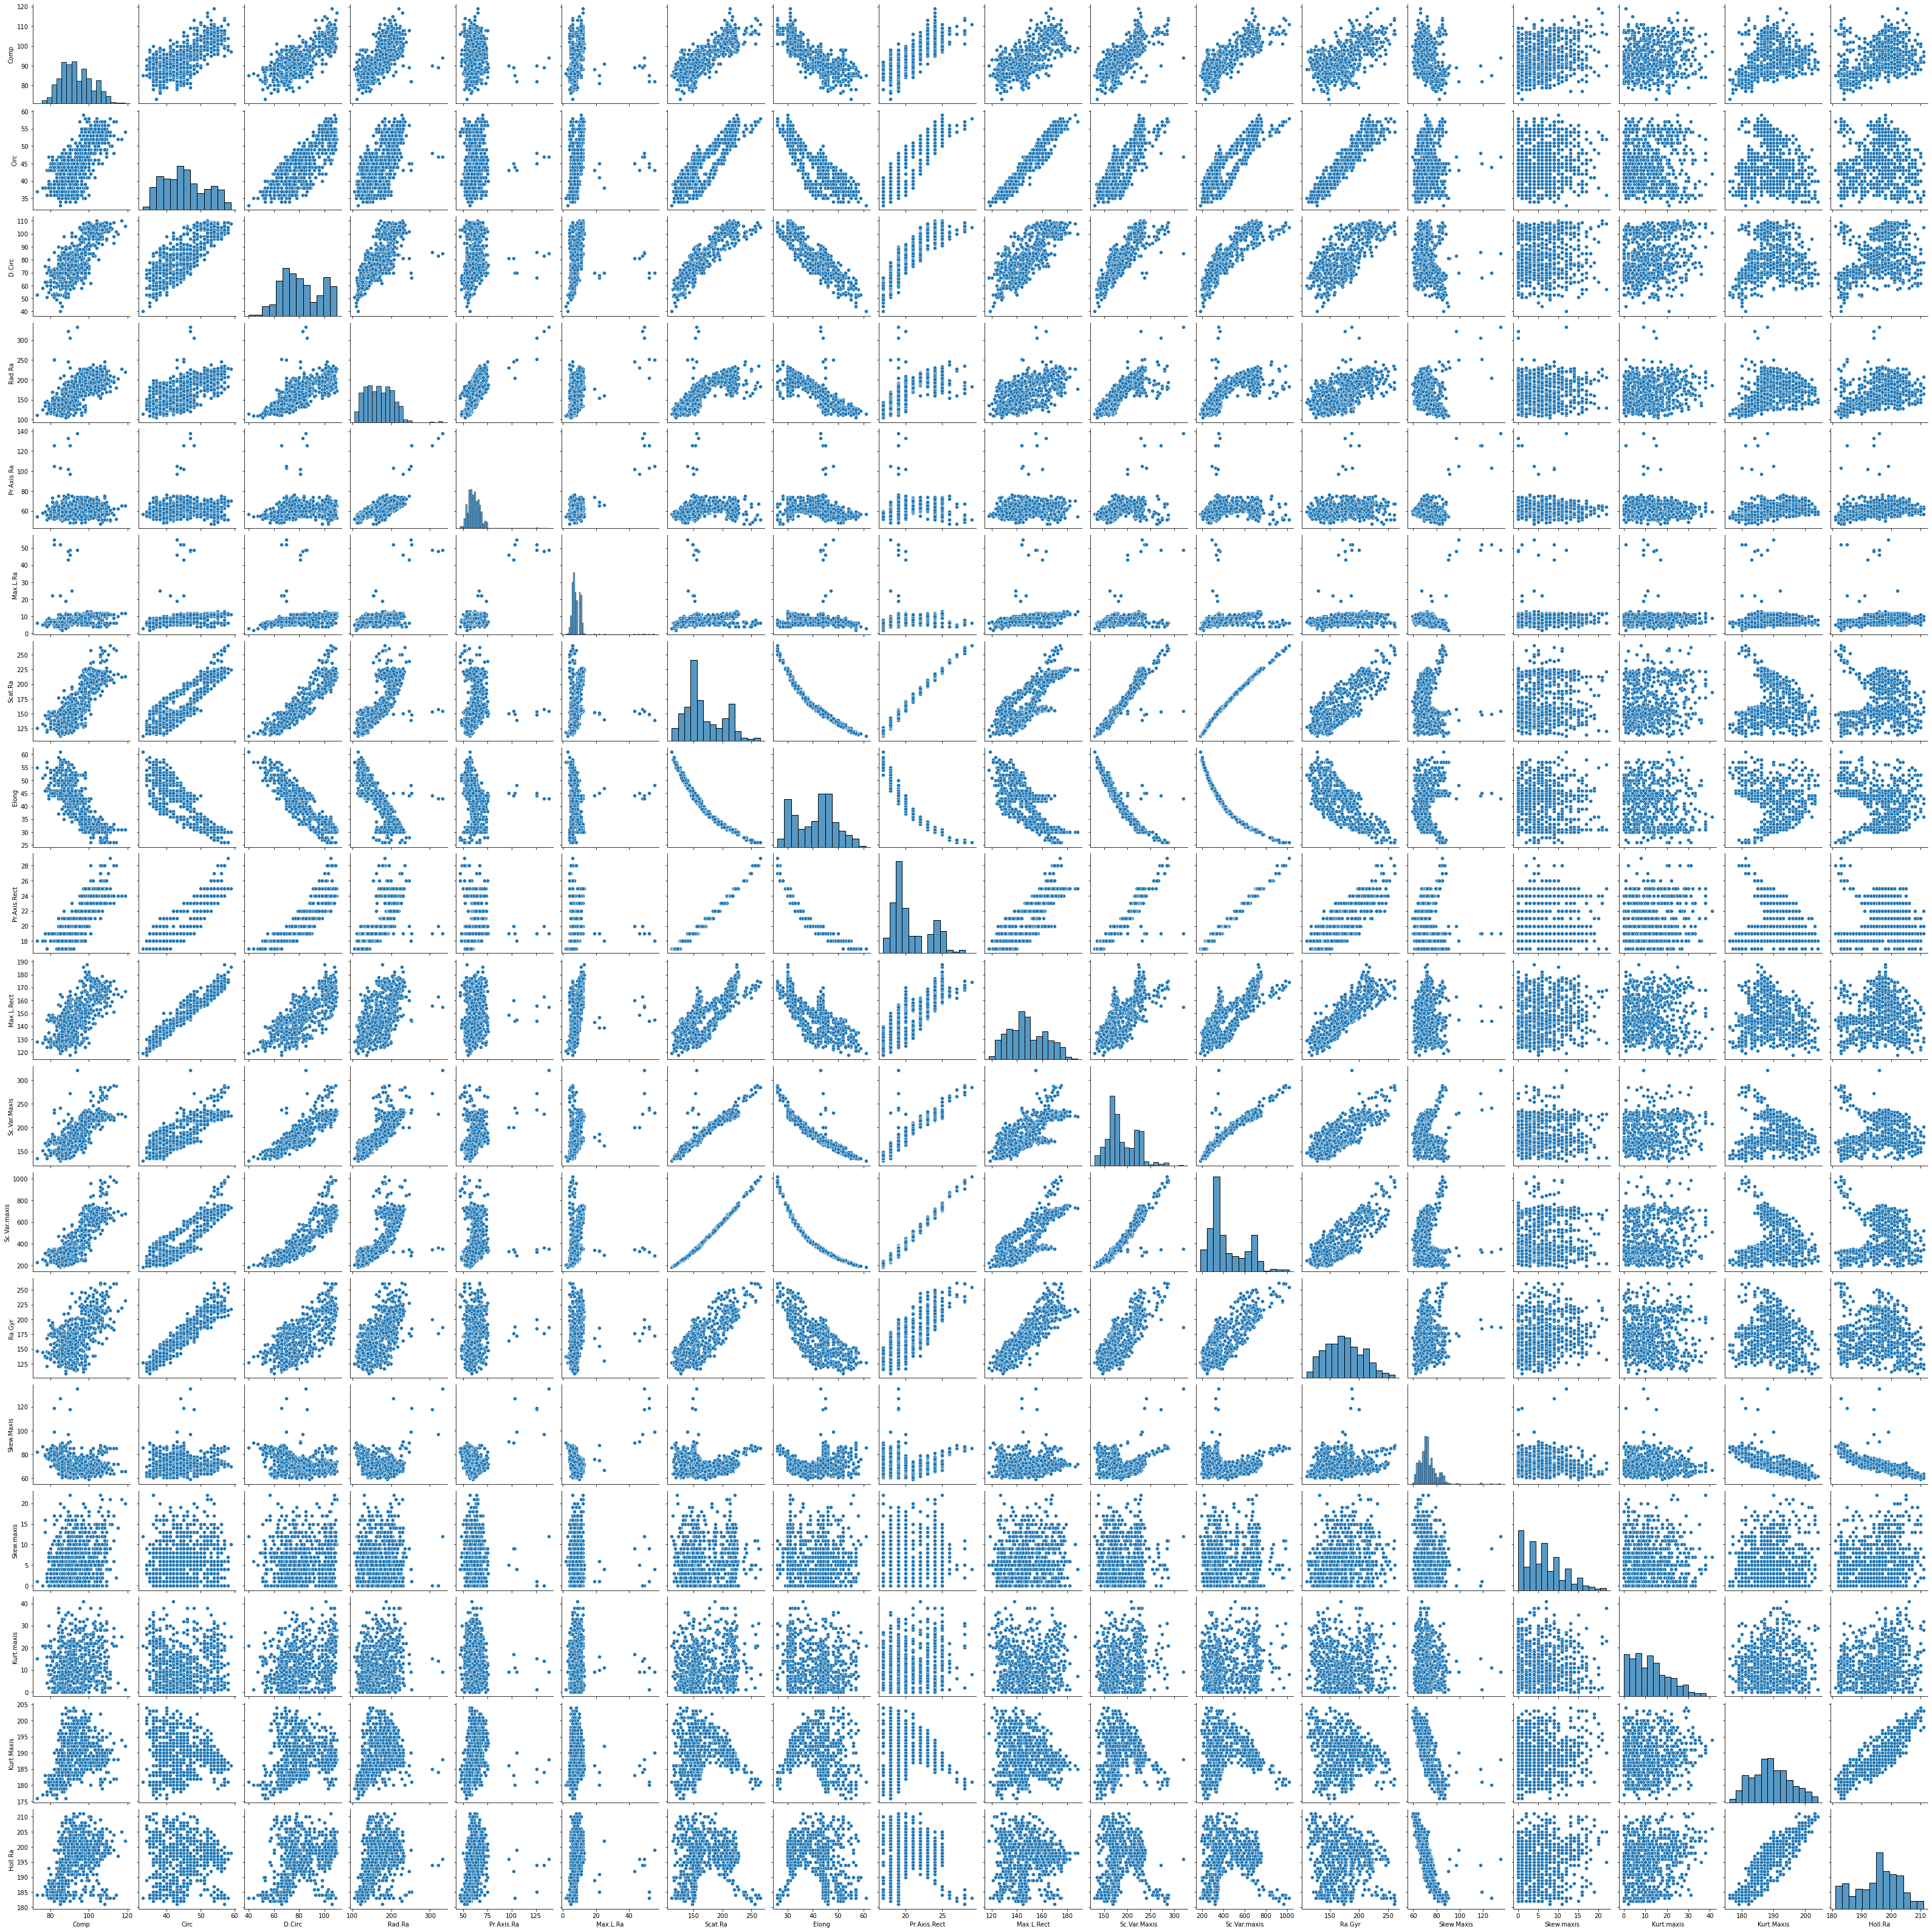

In [113]:
sns.pairplot(dt)

In [114]:
df['Class'].value_counts()


0    189
1    180
3    177
2    173
Name: Class, dtype: int64

0 –bus, 
1 – Opel Manta, 
2 –Saab, 
3 – Van

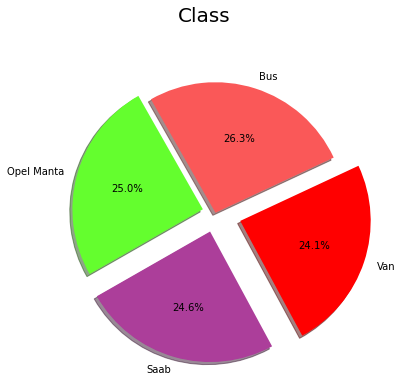

In [171]:
f = plt.subplots(1, figsize=(12,6))

colors = ["#FA5858", "#64FE2E","#ac3e9a","red"]
labels ="Bus","Opel Manta","Saab" ,"Van"

plt.suptitle('Class', fontsize=20)

plt.pie(dataframe['Class'].value_counts(),labels=labels,explode=(0,0.1,0.15,0.20),shadow=True,colors=colors, startangle=25,autopct='%1.1f%%')

plt.show()

In [116]:
df.skew()

Comp            0.367369
Circ            0.282597
D.Circ          0.132708
Rad.Ra          0.464858
Pr.Axis.Ra      3.890809
Max.L.Ra        6.510636
Scat.Ra         0.637935
Elong           0.008583
Pr.Axis.Rect    0.806617
Max.L.Rect      0.282441
Sc.Var.Maxis    0.693518
Sc.Var.maxis    0.861416
Ra.Gyr          0.271644
Skew.Maxis      2.284815
Skew.maxis      0.726757
Kurt.maxis      0.675624
Kurt.Maxis      0.248481
Holl.Ra        -0.211066
Class           0.039451
dtype: float64

C:\Users\Balaji Suguna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Balaji Suguna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Balaji Suguna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

<AxesSubplot:xlabel='Ra.Gyr'>

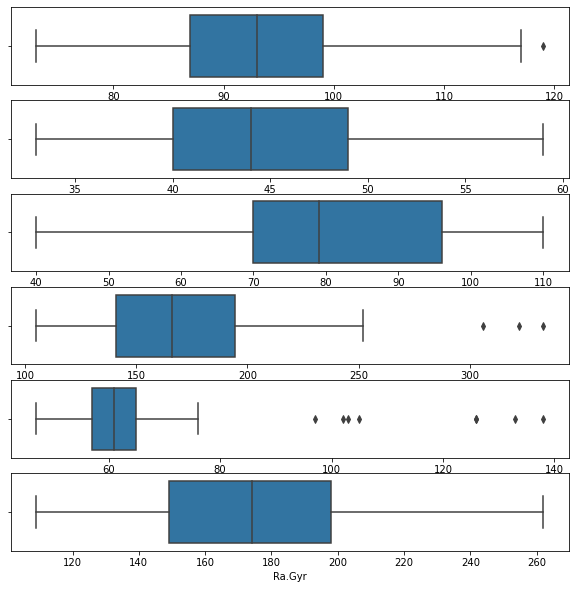

In [117]:
plt.figure(figsize=(10,10))
plt.subplot(6,1,1)
sns.boxplot(df.Comp)
plt.subplot(6,1,2)
sns.boxplot(df.Circ)
plt.subplot(6,1,3)
sns.boxplot(df['D.Circ'])
plt.subplot(6,1,4)
sns.boxplot(df['Rad.Ra'])
plt.subplot(6,1,5)
sns.boxplot(df['Pr.Axis.Ra'])
plt.subplot(6,1,6)
sns.boxplot(df["Ra.Gyr"])

C:\Users\Balaji Suguna\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Balaji Suguna\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Holl.Ra', ylabel='Density'>

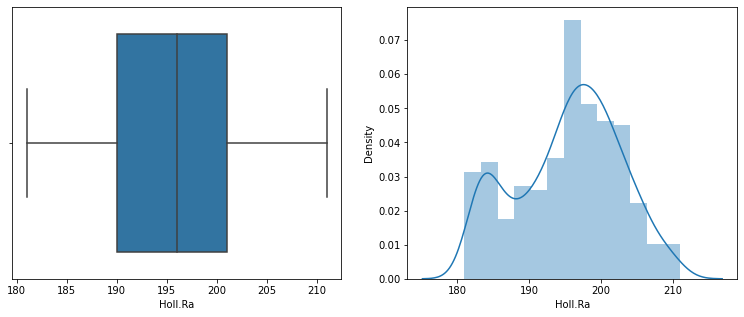

In [118]:
fig,(a1,a2)=plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'Holl.Ra', data = df, orient = 'v', ax = a1)
sns.distplot(df['Holl.Ra'], ax = a2)

<AxesSubplot:>

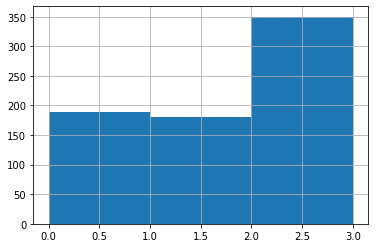

In [119]:
df["Class"].hist(bins=3)

<AxesSubplot:xlabel='Elong', ylabel='Scat.Ra'>

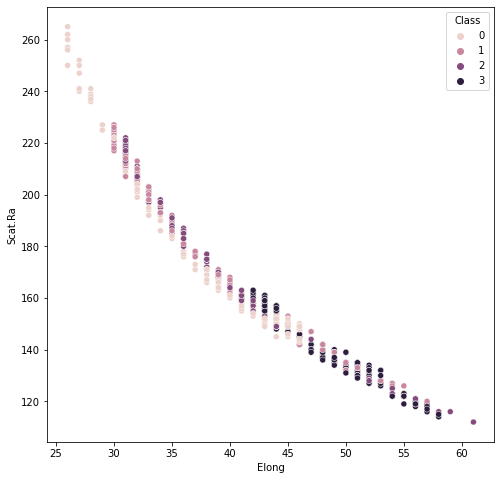

In [120]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Elong',y='Scat.Ra' ,data=df,hue='Class')

<AxesSubplot:xlabel='Circ', ylabel='Max.L.Rect'>

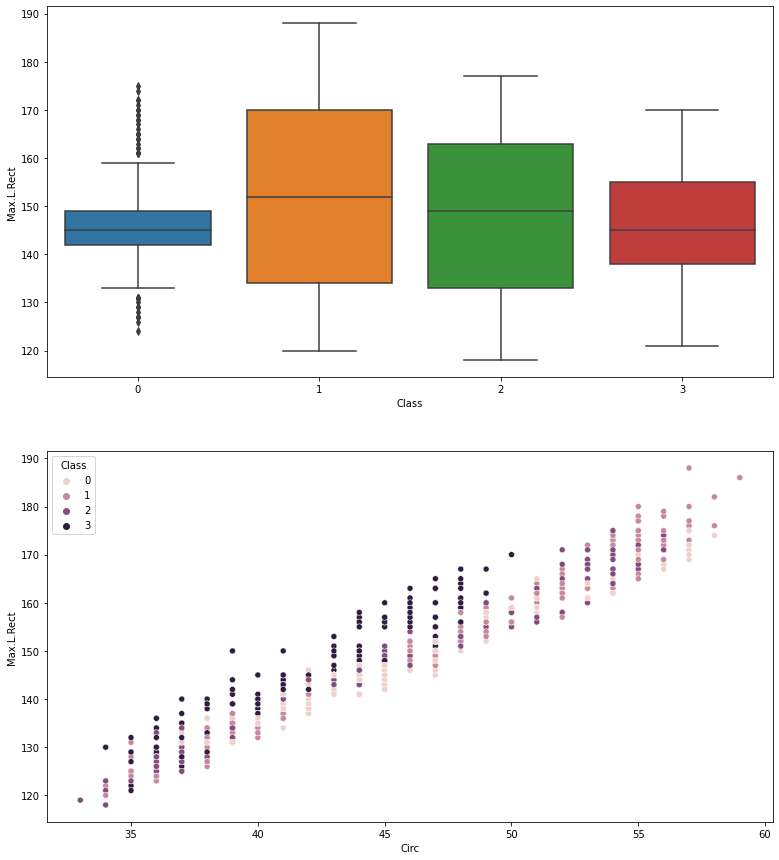

In [121]:
fig,(a1,a2)=plt.subplots(nrows = 2, ncols = 1, figsize = (13, 15))
sns.boxplot(x='Class',y='Max.L.Rect',data=df,ax=a1)
sns.scatterplot(x='Circ',y='Max.L.Rect',hue='Class',data=df,ax=a2)

1. Car and Opel Manta has a wide range of cicularity and also max.length_rectangularity.
2. Whereas the bus and van  do not.
3. So cicularity and max.lenght_rectangularity can be used to classify mainly bus and van but not cars and Opel Manta

<Figure size 720x720 with 0 Axes>

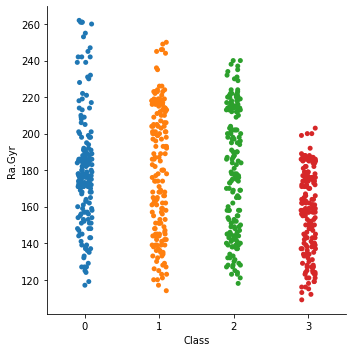

In [122]:
plt.figure(figsize=(10,10))
sns.catplot(x="Class",y='Ra.Gyr', data=df)

<AxesSubplot:xlabel='Circ', ylabel='D.Circ'>

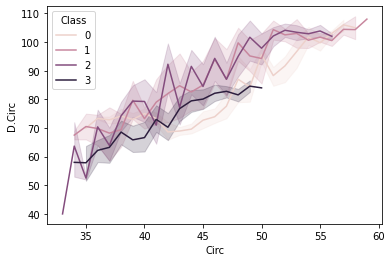

In [123]:
sns.lineplot(x='Circ',y='D.Circ',data=df,hue='Class')

The distance_circularity increases as circularity increases for all the class of vehicles.
also we can infer that the van has lesser cirularity and distance_circularity than others
Corelation of Attributes

In [124]:
corelation=dt.corr()
corelation

Comp      Circ    D.Circ    Rad.Ra  Pr.Axis.Ra  Max.L.Ra  \
Comp          1.000000  0.685515  0.782416  0.681598    0.098000  0.120446   
Circ          0.685515  1.000000  0.799001  0.621623    0.156770  0.234471   
D.Circ        0.782416  0.799001  1.000000  0.764652    0.168777  0.240817   
Rad.Ra        0.681598  0.621623  0.764652  1.000000    0.679403  0.447076   
Pr.Axis.Ra    0.098000  0.156770  0.168777  0.679403    1.000000  0.669598   
Max.L.Ra      0.120446  0.234471  0.240817  0.447076    0.669598  1.000000   
Scat.Ra       0.807686  0.860339  0.905598  0.736257    0.117125  0.146370   
Elong        -0.784352 -0.828911 -0.910257 -0.788814   -0.193680 -0.157702   
Pr.Axis.Rect  0.808425  0.857357  0.894926  0.708706    0.089976  0.142009   
Max.L.Rect    0.669999  0.965119  0.773701  0.565054    0.134261  0.291938   
Sc.Var.Maxis  0.756467  0.803929  0.858005  0.805961    0.305815  0.319976   
Sc.Var.maxis  0.813816  0.851841  0.887997  0.725038    0.104121  0.125102   
Ra.Gyr        0.584643  0.938749  0.715118  0.549433    0.137493  0.188278   
Skew.Maxis   -0.249420  0.053117 -0.227167 -0.137810    0.208299  0.348971   
Skew.maxis    0.213224  0.137134  0.118065  0.053169   -0.054422  0.009765   
Kurt.maxis    0.136192 -0.041619  0.240566  0.154588   -0.035425  0.018541   
Kurt.Maxis    0.315362 -0.103991  0.155967  0.382966    0.228666 -0.045766   
Holl.Ra       0.370891  0.050379  0.342472  0.463067    0.257122  0.123778   

               Scat.Ra     Elong  Pr.Axis.Rect  Max.L.Rect  Sc.Var.Maxis  \
Comp          0.807686 -0.784352      0.808425    0.669999      0.756467   
Circ          0.860339 -0.828911      0.857357    0.965119      0.803929   
D.Circ        0.905598 -0.910257      0.894926    0.773701      0.858005   
Rad.Ra        0.736257 -0.788814      0.708706    0.565054      0.805961   
Pr.Axis.Ra    0.117125 -0.193680      0.089976    0.134261      0.305815   
Max.L.Ra      0.146370 -0.157702      0.142009    0.291938      0.319976   
Scat.Ra       1.000000 -0.973523      0.991787    0.809629      0.945460   
Elong        -0.973523  1.000000     -0.949891   -0.773279     -0.932824   
Pr.Axis.Rect  0.991787 -0.949891      1.000000    0.812405      0.931380   
Max.L.Rect    0.809629 -0.773279      0.812405    1.000000      0.742417   
Sc.Var.Maxis  0.945460 -0.932824      0.931380    0.742417      1.000000   
Sc.Var.maxis  0.996412 -0.957282      0.992075    0.796484      0.943641   
Ra.Gyr        0.804632 -0.771836      0.801218    0.869801      0.779030   
Skew.Maxis   -0.033373  0.106339     -0.022921    0.040040      0.126810   
Skew.maxis    0.068231 -0.053248      0.074895    0.126961      0.031305   
Kurt.maxis    0.191242 -0.165277      0.194278   -0.031125      0.176618   
Kurt.Maxis    0.021518 -0.131054     -0.006111   -0.106711      0.030397   
Holl.Ra       0.131811 -0.230072      0.109542    0.081309      0.096428   

              Sc.Var.maxis    Ra.Gyr  Skew.Maxis  Skew.maxis  Kurt.maxis  \
Comp              0.813816  0.584643   -0.249420    0.213224    0.136192   
Circ              0.851841  0.938749    0.053117    0.137134   -0.041619   
D.Circ            0.887997  0.715118   -0.227167    0.118065    0.240566   
Rad.Ra            0.725038  0.549433   -0.137810    0.053169    0.154588   
Pr.Axis.Ra        0.104121  0.137493    0.208299   -0.054422   -0.035425   
Max.L.Ra          0.125102  0.188278    0.348971    0.009765    0.018541   
Scat.Ra           0.996412  0.804632   -0.033373    0.068231    0.191242   
Elong            -0.957282 -0.771836    0.106339   -0.053248   -0.165277   
Pr.Axis.Rect      0.992075  0.801218   -0.022921    0.074895    0.194278   
Max.L.Rect        0.796484  0.869801    0.040040    0.126961   -0.031125   
Sc.Var.Maxis      0.943641  0.779030    0.126810    0.031305    0.176618   
Sc.Var.maxis      1.000000  0.799643   -0.026234    0.068733    0.186062   
Ra.Gyr            0.799643  1.000000    0.172230    0.166112   -0.068230   
Skew.Maxis       -0.026234

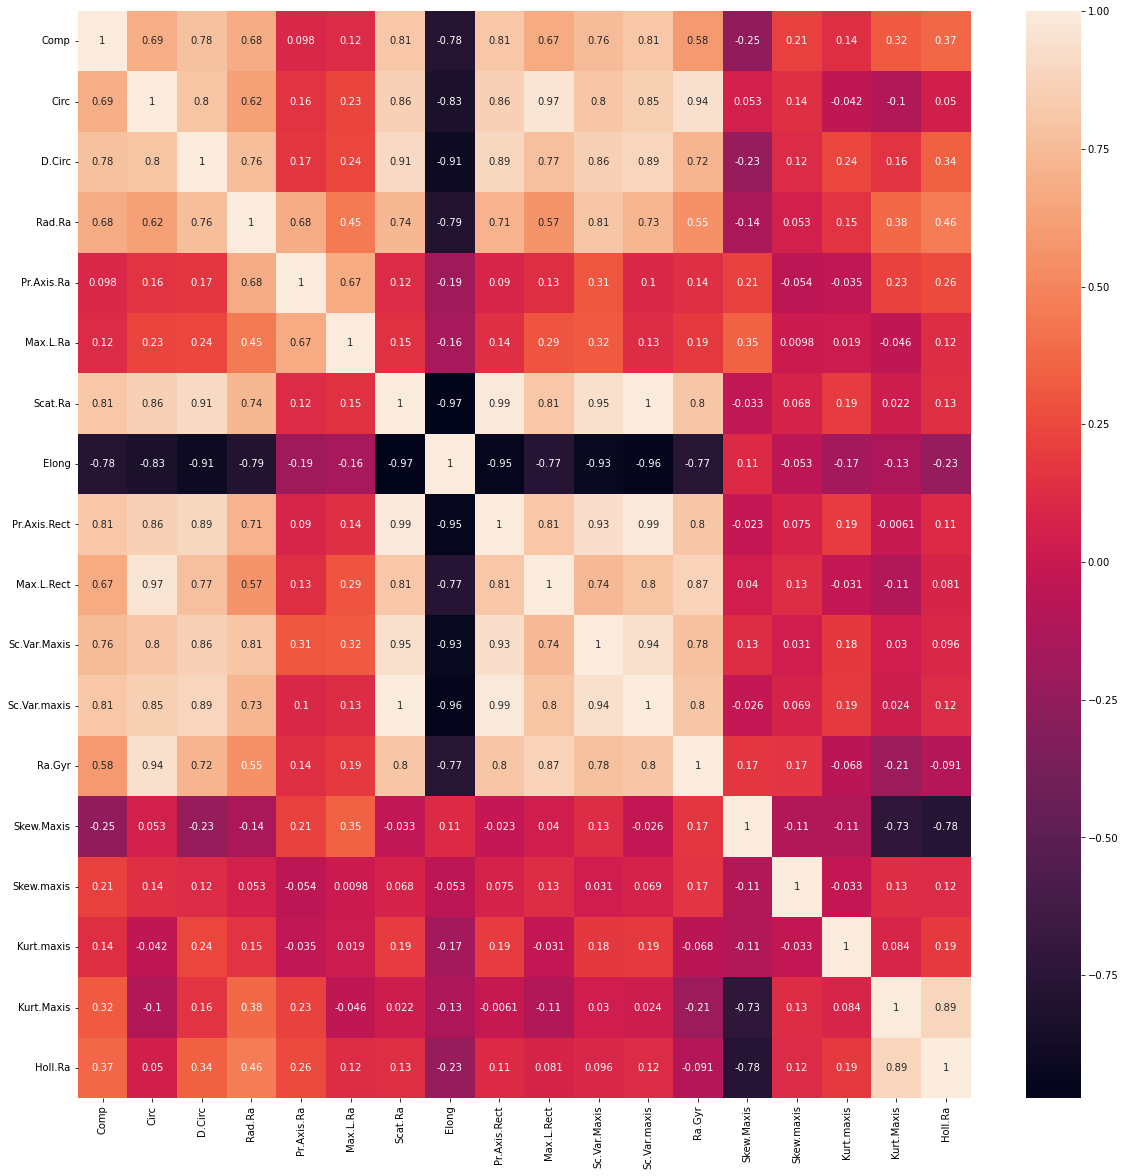

In [125]:
plt.figure(figsize=(20,20))
a=sns.heatmap(corelation,annot=True)

In [126]:
df.columns

Index(['Comp', 'Circ', 'D.Circ', 'Rad.Ra', 'Pr.Axis.Ra', 'Max.L.Ra', 'Scat.Ra',
       'Elong', 'Pr.Axis.Rect', 'Max.L.Rect', 'Sc.Var.Maxis', 'Sc.Var.maxis',
       'Ra.Gyr', 'Skew.Maxis', 'Skew.maxis', 'Kurt.maxis', 'Kurt.Maxis',
       'Holl.Ra', 'Class'],
      dtype='object')

In [127]:
features=['Comp', 'Circ', 'D.Circ', 'Rad.Ra', 'Pr.Axis.Ra', 'Max.L.Ra', 'Scat.Ra',
       'Elong', 'Pr.Axis.Rect', 'Max.L.Rect', 'Sc.Var.Maxis', 'Sc.Var.maxis',
       'Ra.Gyr', 'Skew.Maxis', 'Skew.maxis', 'Kurt.maxis', 'Kurt.Maxis',
       'Holl.Ra']
X=df[features]
Y=df['Class']   

Normalising the data



In [128]:
X=X.apply(zscore) 
X

Comp      Circ    D.Circ    Rad.Ra  Pr.Axis.Ra  Max.L.Ra   Scat.Ra  \
ID                                                                            
1   -0.670551 -0.952030 -0.755489 -0.076363    0.503186 -0.330899 -0.611815   
2   -1.040658 -1.602859 -1.142151 -1.171502   -0.587275 -0.534421 -1.584026   
3   -0.300444 -0.626615  0.146724 -0.816322   -0.587275  0.076144 -0.581433   
4    1.056615  1.488579  1.048937  0.249219   -0.708437  0.279665  1.545277   
5   -0.793920 -0.952030 -0.497714 -0.490740   -0.466113 -0.534421 -0.520670   
..        ...       ...       ...       ...         ...       ...       ...   
715  2.166936  2.139408  1.500043  0.426809   -1.314249 -0.534421  2.942830   
716 -0.053706 -0.301201 -0.368826 -0.579535   -0.587275 -0.330899 -0.581433   
717 -0.423813 -0.463908 -1.206595 -0.727527   -0.344950 -0.330899 -1.128302   
718  0.933246  1.813994  1.242268  1.847531    1.230160  0.279665  1.484514   
719  0.686508 -1.114737 -0.497714  0.456408    0.503186 -0.534421 -0.125710   

        Elong  Pr.Axis.Rect  Max.L.Rect  Sc.Var.Maxis  Sc.Var.maxis    Ra.Gyr  \
ID                                                                              
1    0.376965     -0.598352   -0.964305     -0.678174     -0.596051 -0.987512   
2    2.052426     -1.379850   -1.582863     -1.607254     -1.351013 -1.610038   
3    0.505847     -0.598352   -0.345746     -0.582062     -0.607490 -0.520618   
4   -1.298496      1.746143    1.578657      0.987763      1.543007  1.502589   
5    0.376965     -0.598352   -0.826847     -0.453913     -0.567454 -1.080891   
..        ...           ...         ...           ...           ...       ...   
715 -1.942904      3.309139    1.784843      3.102222      3.327463  2.498630   
716  0.376965     -0.598352   -0.345746     -0.517988     -0.578893  0.039655   
717  1.150255     -0.989101   -0.414475     -1.094658     -1.013568 -0.396113   
718 -1.298496      1.355394    1.578657      1.404247      1.497252  1.284705   
719 -0.267443     -0.207602   -1.170491      0.154795     -0.127060 -1.174270   

     Skew.Maxis  Skew.maxis  Kurt.maxis  Kurt.Maxis   Holl.Ra  
ID                                                             
1     -0.488654   -0.276858    0.069251    0.695144  0.773497  
2     -1.019383   -1.101126    1.213883    1.191478  1.050118  
3     -0.090608    0.547410    0.183714    0.033365  0.496877  
4     -0.090608   -0.276858    0.527104   -0.462969  0.081947  
5     -0.355972   -1.101126    2.358516   -0.297524  0.081947  
..          ...         ...         ...         ...       ...  
715    1.634260   -0.482925   -0.503065   -1.290193 -1.716083  
716   -0.488654    1.577745   -1.418771    0.033365 -0.194673  
717   -1.019383    1.783812   -1.075381    1.356923  1.188428  
718   -0.090608   -0.895059   -0.731992   -0.297524  0.220257  
719   -0.223290   -0.895059    1.099420    1.853257  0.911807  

[719 rows x 18 columns]

In [129]:

Y.replace(['Bus','Opel Manta','Saab','Van'],[0,1,2,3],inplace=True)
Y

ID
1      0
2      3
3      3
4      1
5      2
      ..
715    0
716    2
717    3
718    2
719    0
Name: Class, Length: 719, dtype: int64

# Splitting the Data
Splitting the model in 80:20 ratio

In [130]:
train_X,test_X,train_y,test_y=train_test_split(X,Y,test_size=0.2,random_state=1)
train_X.count() 

Comp            575
Circ            575
D.Circ          575
Rad.Ra          575
Pr.Axis.Ra      575
Max.L.Ra        575
Scat.Ra         575
Elong           575
Pr.Axis.Rect    575
Max.L.Rect      575
Sc.Var.Maxis    575
Sc.Var.maxis    575
Ra.Gyr          575
Skew.Maxis      575
Skew.maxis      575
Kurt.maxis      575
Kurt.Maxis      575
Holl.Ra         575
dtype: int64

In [131]:
train_X.head()

Comp      Circ    D.Circ    Rad.Ra  Pr.Axis.Ra  Max.L.Ra   Scat.Ra  \
ID                                                                            
35   1.303353  1.163165  0.920049  0.574801   -0.344950  0.076144  0.603448   
186 -0.547182 -1.114737 -0.239939 -0.461142   -0.102626 -0.330899 -0.672578   
155 -0.423813  0.349628  0.211168 -0.224355    0.260861  0.279665 -0.156091   
713 -0.177075 -1.602859 -1.528814 -0.964314   -0.466113 -0.534421 -1.401736   
668 -0.917289 -0.301201 -0.755489 -1.260297   -0.708437 -0.534421 -0.611815   

        Elong  Pr.Axis.Rect  Max.L.Rect  Sc.Var.Maxis  Sc.Var.maxis    Ra.Gyr  \
ID                                                                              
35  -0.782969      0.573896    0.891370      0.571279      0.536391  0.942316   
186  0.634729     -0.598352   -1.445406     -0.710211     -0.699001 -1.018639   
155  0.119202     -0.207602    0.822641     -0.357801     -0.270045  0.319791   
713  1.794663     -1.379850   -1.101762     -1.479105     -1.225186 -1.827922   
668  0.634729     -0.598352   -0.208289     -0.710211     -0.681843 -0.115977   

     Skew.Maxis  Skew.maxis  Kurt.maxis  Kurt.Maxis   Holl.Ra  
ID                                                             
35    -0.754019    0.959544   -0.503065    0.695144  0.635187  
186   -0.488654   -1.307193   -0.388602   -0.297524 -0.194673  
155    0.042074    0.547410   -1.418771   -0.628414 -0.056363  
713   -1.152065   -0.070791    0.527104    1.356923  1.050118  
668    1.766943   -0.070791   -0.388602   -1.621082 -1.854393

In [132]:
test_X.count()

Comp            144
Circ            144
D.Circ          144
Rad.Ra          144
Pr.Axis.Ra      144
Max.L.Ra        144
Scat.Ra         144
Elong           144
Pr.Axis.Rect    144
Max.L.Rect      144
Sc.Var.Maxis    144
Sc.Var.maxis    144
Ra.Gyr          144
Skew.Maxis      144
Skew.maxis      144
Kurt.maxis      144
Kurt.Maxis      144
Holl.Ra         144
dtype: int64

In [133]:
test_X.head()

Comp      Circ    D.Circ    Rad.Ra  Pr.Axis.Ra  Max.L.Ra   Scat.Ra  \
ID                                                                            
60  -0.053706 -1.440152 -1.206595 -0.875519   -0.587275 -0.127378 -1.097920   
61   2.166936  0.837750  1.371155  0.900383   -0.223788  0.483186  1.302225   
215 -1.287396 -0.138494 -0.884376 -0.727527   -0.102626 -0.127378 -0.642197   
637  0.069663 -1.114737  0.404499  0.308416   -0.223788 -0.330899  0.056580   
9    1.673460  1.651286  1.048937  0.900383   -0.344950 -0.330899  2.183291   

        Elong  Pr.Axis.Rect  Max.L.Rect  Sc.Var.Maxis  Sc.Var.maxis    Ra.Gyr  \
ID                                                                              
60   1.150255     -0.989101   -0.826847     -0.966509     -1.007849 -1.672290   
61  -1.298496      1.355394    0.547727      1.115912      1.297073  0.413170   
215  0.505847     -0.598352   -0.345746     -0.582062     -0.636087  0.164160   
637 -0.267443      0.183147   -1.170491     -0.005392     -0.006952 -0.956386   
9   -1.814022      2.136892    1.372471      2.237216      2.458113  2.187367   

     Skew.Maxis  Skew.maxis  Kurt.maxis  Kurt.Maxis   Holl.Ra  
ID                                                             
60    -0.754019   -0.688992    1.671736    0.695144  0.773497  
61    -0.621336    0.547410   -0.388602    0.198810  0.635187  
215    0.174757   -1.101126   -1.304308   -0.628414 -0.609603  
637   -0.886701   -0.895059    1.786200    1.026033  1.188428  
9      0.970850   -0.688992   -1.304308   -0.462969 -1.577773

# Training the model

In [134]:
parameters={
    'C':[0.01,0.25,0.5,1],
    'kernel':['rbf','linear']
}
model=SVC()
best_SVC=GridSearchCV(model,param_grid=parameters,scoring='accuracy',cv=10)
best_SVC

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.01, 0.25, 0.5, 1],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [135]:
best_SVC.fit(train_X,train_y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.01, 0.25, 0.5, 1],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [136]:
best_SVC.best_params_

{'C': 1, 'kernel': 'linear'}

In [137]:
svm_model=SVC(C=1,kernel='rbf',random_state=1)
svm_model

SVC(C=1, random_state=1)

In [138]:
final_model=svm_model.fit(train_X,train_y)

In [139]:
predict=final_model.predict(test_X)
print(predict[0:1000])
metrics=confusion_matrix(test_y,predict)
metrics

[3 2 0 1 0 2 0 3 2 2 0 2 0 0 0 3 1 3 3 3 1 2 1 0 2 1 0 2 3 3 0 3 2 2 2 0 1
 1 2 2 3 3 0 3 0 0 1 3 2 3 0 2 2 0 3 2 3 2 0 0 3 3 3 2 1 1 2 2 3 0 1 1 1 0
 1 1 0 1 0 3 0 0 2 2 1 0 0 1 3 3 3 0 0 0 2 3 3 3 0 2 3 3 1 1 1 2 0 2 0 1 3
 3 2 0 1 0 0 0 3 0 0 3 0 0 3 1 0 3 0 3 2 3 0 3 0 1 2 0 2 0 2 3 2 0]


array([[43,  0,  0,  1],
       [ 2, 13, 12,  3],
       [ 1, 12, 21,  1],
       [ 1,  0,  0, 34]], dtype=int64)

<AxesSubplot:>

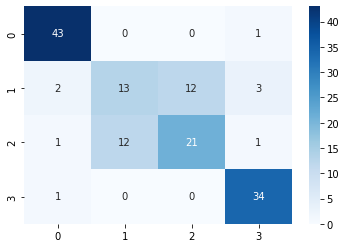

In [140]:
sns.heatmap(metrics,annot=True,fmt='g',cmap='Blues')

In [141]:
print(classification_report(test_y,predict))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95        44
           1       0.52      0.43      0.47        30
           2       0.64      0.60      0.62        35
           3       0.87      0.97      0.92        35

    accuracy                           0.77       144
   macro avg       0.74      0.75      0.74       144
weighted avg       0.75      0.77      0.76       144



In [142]:
svm_accuracy=accuracy_score(test_y,predict)
svm_accuracy

0.7708333333333334

In [143]:
svm_eval = cross_val_score(estimator = final_model, X = train_X, y = train_y, cv = 10)
svm_eval.mean()

0.7650332728372656

# Giving n_components as 18 i.e the number of columns (Except class)

In [144]:
pca=PCA(n_components=18)
pca


PCA(n_components=18)

# Fitting the mondel the pca and displaying Eigen values

In [145]:
pca.fit(X)
pca.explained_variance_

array([9.41929861e+00, 2.96173581e+00, 1.97827351e+00, 1.18603452e+00,
       9.18819081e-01, 5.31206807e-01, 3.47610340e-01, 2.29685435e-01,
       1.57262026e-01, 9.08924927e-02, 6.49429515e-02, 4.69767484e-02,
       3.51761438e-02, 2.15640233e-02, 1.61405948e-02, 1.27750325e-02,
       6.30628006e-03, 3.69232810e-04])

# Variance ratio will be

In [146]:
pca.explained_variance_ratio_

array([5.22566559e-01, 1.64312031e-01, 1.09751227e-01, 6.57991645e-02,
       5.09745094e-02, 2.94704441e-02, 1.92848264e-02, 1.27425547e-02,
       8.72462793e-03, 5.04255986e-03, 3.60292375e-03, 2.60618957e-03,
       1.95151223e-03, 1.19633509e-03, 8.95452560e-04, 7.08736931e-04,
       3.49861620e-04, 2.04844041e-05])

# And the eigen vectors will be

In [147]:
pca.components_

array([[ 2.73255098e-01,  2.95282788e-01,  3.04104866e-01,
         2.68025700e-01,  8.52144214e-02,  9.12807094e-02,
         3.17126339e-01, -3.13900612e-01,  3.13958490e-01,
         2.82045065e-01,  3.08934607e-01,  3.14550223e-01,
         2.73933071e-01, -1.97108686e-02,  3.96766471e-02,
         4.94167018e-02,  3.44406910e-02,  7.74194238e-02],
       [-1.35805210e-01,  1.30898236e-01, -7.59376745e-02,
        -1.69548821e-01, -8.30079583e-02,  5.27756133e-02,
         4.22447123e-02,  1.79189777e-02,  5.49111665e-02,
         1.21436996e-01,  6.44891625e-02,  4.52315490e-02,
         2.01390340e-01,  4.94607891e-01, -7.40493417e-02,
        -1.23974080e-01, -5.45521612e-01, -5.38998427e-01],
       [-1.06773628e-01, -4.62494987e-02, -5.18912665e-02,
         2.91858736e-01,  6.40280412e-01,  5.87032554e-01,
        -9.98063258e-02,  5.80343972e-02, -1.13712789e-01,
        -3.40344996e-02,  6.61112699e-02, -1.10272190e-01,
        -4.99425523e-02,  2.76118132e-01, -1.00205168e

# Bar plotting the eigen values

<AxesSubplot:>

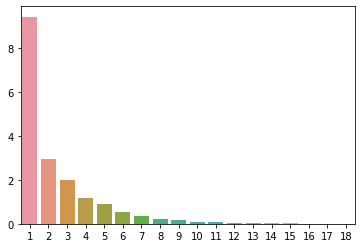

In [148]:
sns.barplot(x=list(range(1,19)),y=pca.explained_variance_)

In [149]:
##Elbow plotting the eigen values

Text(0, 0.5, 'Eigenvalue')

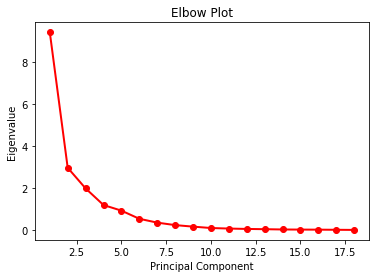

In [150]:
plt.plot(list(range(1,19)),pca.explained_variance_,'ro-', linewidth=2)
plt.title('Elbow Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

Text(0.5, 0, 'Eigen value')

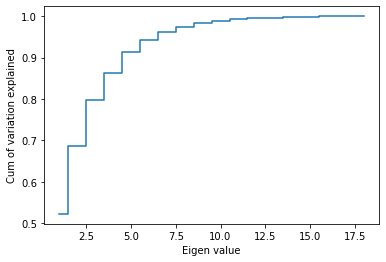

In [151]:
plt.step(list(range(1,19)), np.cumsum(pca.explained_variance_ratio_), where = 'mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('Eigen value')

In [152]:
pca=PCA(n_components=8)
pca.fit(X)

PCA(n_components=8)

In [153]:
#Eigen value, variance ratio will be 
pca.explained_variance_

array([9.41929861, 2.96173581, 1.97827351, 1.18603452, 0.91881908,
       0.53120681, 0.34761034, 0.22968544])

In [154]:
pca.explained_variance_ratio_

array([0.52256656, 0.16431203, 0.10975123, 0.06579916, 0.05097451,
       0.02947044, 0.01928483, 0.01274255])

In [155]:
pca_X = pca.transform(X)

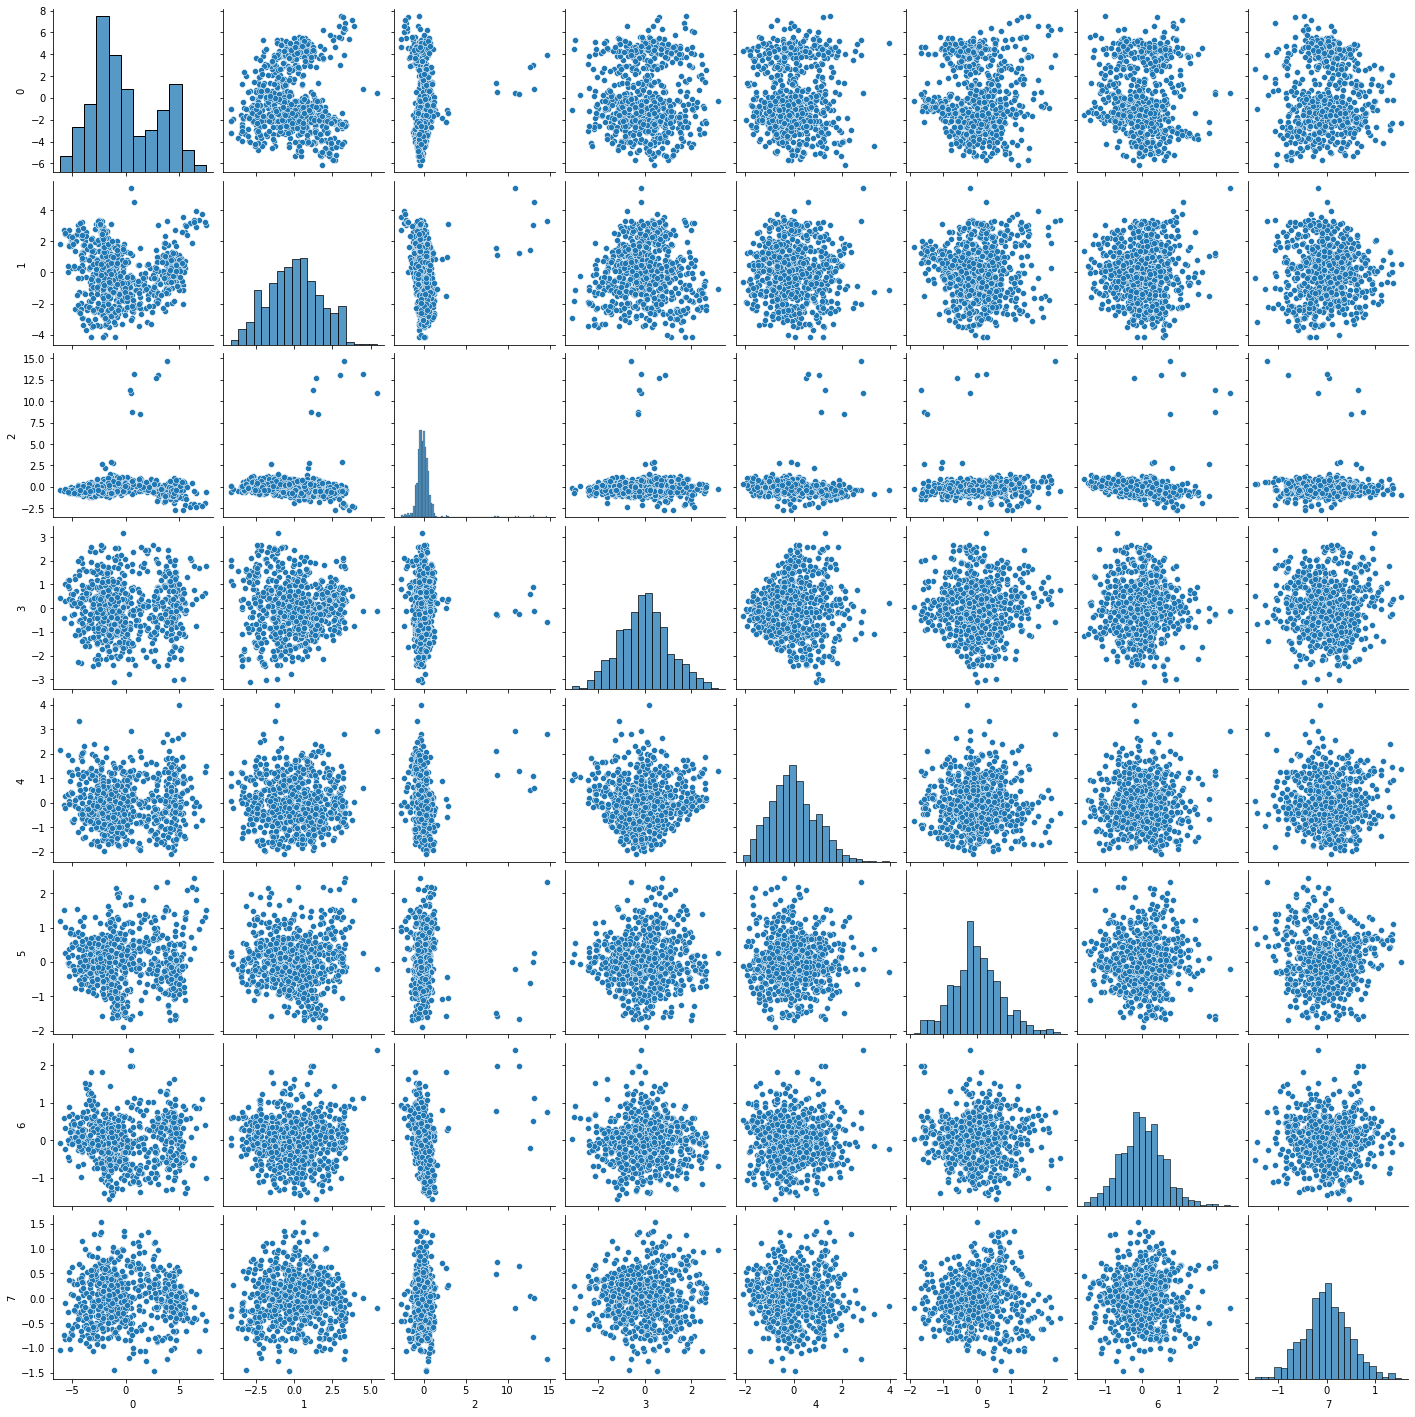

In [156]:
sns.pairplot(pd.DataFrame(pca_X))

So we can see that the correlation is removed among the data and is ready to be get trained on.
The data is reduced to 8 columns

Again splittng and training data

In [157]:
train_X,test_X,train_y,test_y=train_test_split(pca_X,Y,test_size=0.2,random_state=1)
pd.DataFrame(train_X).count()

0    575
1    575
2    575
3    575
4    575
5    575
6    575
7    575
dtype: int64

In [158]:
parameters={
    'C':[0.01,0.25,0.5,1],
    'kernel':['rbf','linear']
}
model=SVC()
best_PCA_SVC_grid=GridSearchCV(model,param_grid=parameters,scoring='accuracy',cv=10)
best_PCA_SVC_grid

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.01, 0.25, 0.5, 1],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [159]:
best_PCA_SVC_grid.fit(train_X,train_y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.01, 0.25, 0.5, 1],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

Getting the best parameters for the model

In [160]:
best_PCA_SVC_grid.best_params_

{'C': 1, 'kernel': 'rbf'}

# Training the model on the above parameters

In [161]:
best_PCA_SVC=SVC(C=1,kernel='rbf',random_state=1)
best_PCA_SVC

SVC(C=1, random_state=1)

Fitting the data in the model

In [162]:
best_PCA_SVC=best_PCA_SVC.fit(train_X,train_y)

Predicting from the model

In [163]:
predict=best_PCA_SVC.predict(test_X)
print(predict[0:1000])
metrics_pca=confusion_matrix(test_y,predict)
metrics_pca

[3 2 0 1 0 3 0 3 2 2 0 2 0 0 0 3 1 3 3 3 1 2 1 0 2 1 0 3 3 3 0 3 1 2 2 0 1
 1 2 2 3 3 0 3 0 0 1 3 1 3 0 2 1 0 3 2 3 2 0 0 3 3 3 1 2 1 2 2 3 0 1 1 1 0
 1 2 0 1 0 3 0 0 1 2 2 2 0 1 3 3 3 0 0 0 2 3 3 3 0 2 3 3 1 1 1 2 0 1 0 1 3
 3 1 0 1 0 0 0 3 3 0 3 0 0 3 1 0 3 0 3 2 3 0 3 0 1 2 3 2 0 2 3 2 0]


array([[41,  0,  1,  2],
       [ 1, 13, 12,  4],
       [ 1, 16, 15,  3],
       [ 1,  0,  0, 34]], dtype=int64)

<AxesSubplot:>

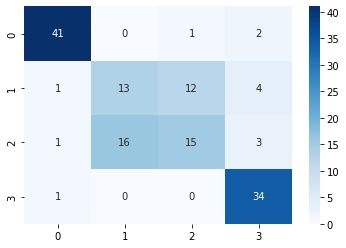

In [164]:
sns.heatmap(metrics_pca,annot=True,fmt='g',cmap='Blues')

In [165]:
print(classification_report(test_y,predict))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        44
           1       0.45      0.43      0.44        30
           2       0.54      0.43      0.48        35
           3       0.79      0.97      0.87        35

    accuracy                           0.72       144
   macro avg       0.68      0.69      0.68       144
weighted avg       0.70      0.72      0.70       144



In [166]:
pca_svm_accuracy=accuracy_score(test_y,predict)
pca_svm_accuracy

0.7152777777777778

In [167]:
pca_svm_eval = cross_val_score(estimator = best_PCA_SVC, X = train_X, y = train_y, cv = 10)
pca_svm_eval.mean()

0.7442226255293406

# Result:
The heat map shows that the model perdicts the outcome pretty good as the data are pretty much correlated.
The f1 score is also looks fine (90%)
As we can see the accuracy is 94.09% which indicates the model predicts well enough.
The mean after the cross validation is also showing the better result 94.4%

Comparing the model
with and without PCA

In [168]:
data=[[svm_accuracy,svm_eval.mean()],[pca_svm_accuracy,pca_svm_eval.mean()]]

In [169]:
compare=pd.DataFrame(data,columns=["Accuracy","Cross validation Mean"],index=["SVC","SVC with PCA"])
compare

Accuracy  Cross validation Mean
SVC           0.770833               0.765033
SVC with PCA  0.715278               0.744223

<AxesSubplot:>

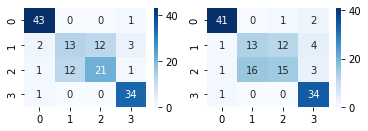

In [170]:
plt.subplot(2,2,1)
sns.heatmap(metrics,annot=True,fmt='g',cmap='Blues')
plt.subplot(2,2,2)
sns.heatmap(metrics_pca,annot=True,fmt='g',cmap='Blues')

# Inference

We can see that SVM is good model for classification as it gives good accuracy score.
And also, the Principal Companent Analysis is good for reducing the dimension of the dataset ( here from 18 to 8 ) with neglegible accuracy and cross validation score (nearly 1 % of decrease) which is good.